## 7 Python Libraries That Make Visualization Beautiful

Charts so good they look designed

#### 1. PyWaffle — Waffle Charts Made Stupid-Simple
Waffle charts are underrated: they show proportions like a heatmap of little squares.

In [3]:
# %pip install pywaffle matplotlib

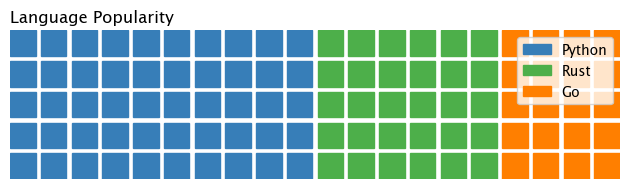

In [4]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

data = {'Python': 50, 'Rust': 30, 'Go': 20}

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=data,
    colors=("#377eb8", "#4daf4a", "#ff7f00"),
    title={'label': 'Language Popularity', 'loc': 'left'}
)
plt.show()

#### 2. Plotnine — The Grammar of Graphics for Python
Most people think ggplot2 exists only in R. Plotnine is its secret twin in Python.

In [6]:
# %pip install plotnine pandas

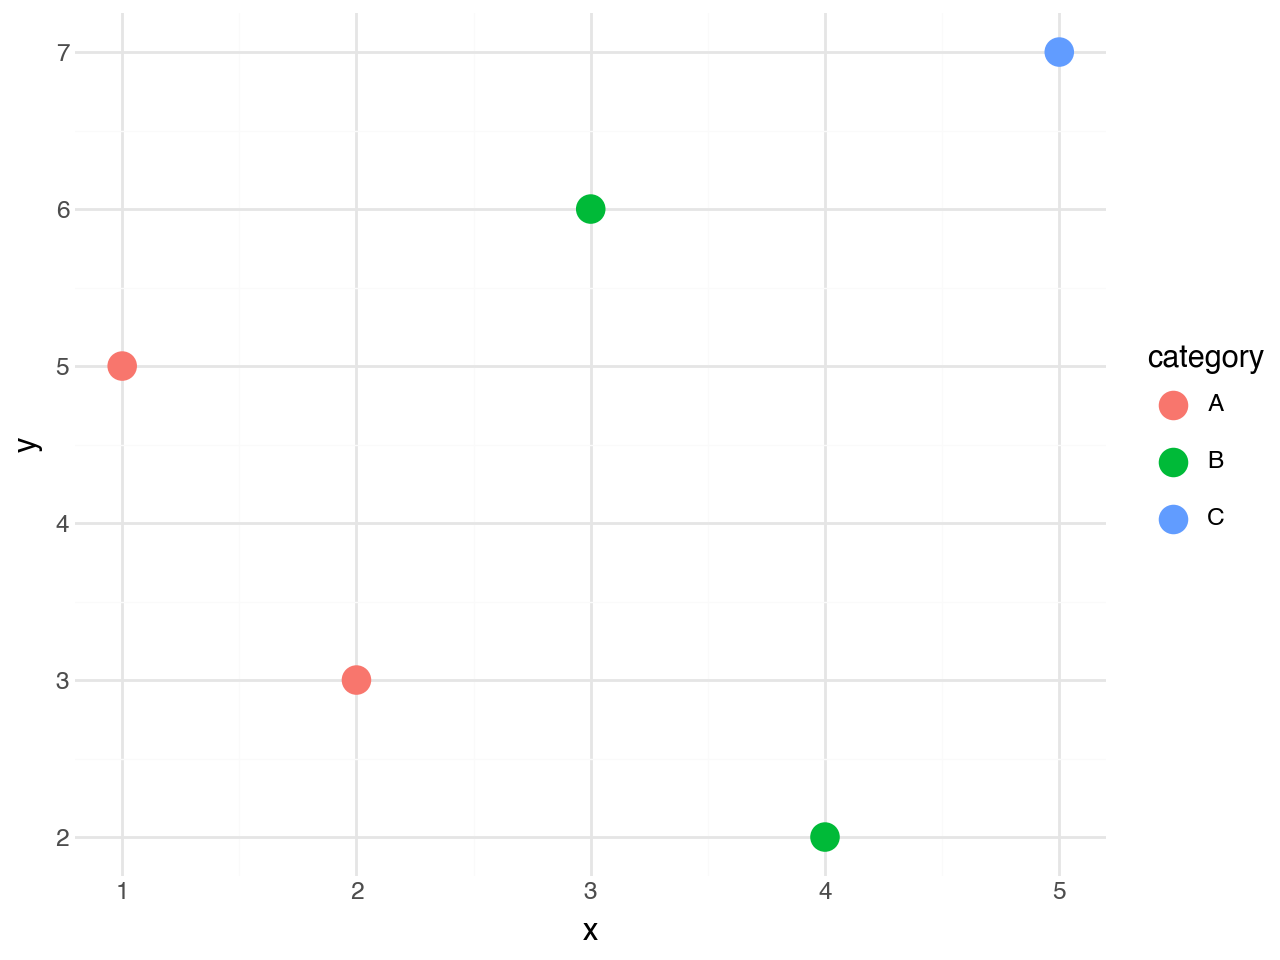

In [7]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, theme_minimal

df = pd.DataFrame({
    'x': [1,2,3,4,5],
    'y': [5,3,6,2,7],
    'category': ['A','A','B','B','C']
})

(ggplot(df, aes('x', 'y', color='category'))
 + geom_point(size=5)
 + theme_minimal())

#### 3. Datashader — Plot Millions of Points Without Melting
Scatterplots of 2 million rows? Matplotlib will cry. Datashader renders them in milliseconds.

In [9]:
# %pip install datashader

In [12]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
import numpy as np

n = 1_000_000
df = pd.DataFrame({'x': np.random.randn(n), 'y': np.random.randn(n)})

canvas = ds.Canvas(plot_width=600, plot_height=600)
agg = canvas.points(df, 'x', 'y')
img = tf.shade(agg, cmap=["lightblue", "darkblue"])
img.to_pil().show()

# show()

#### 4. JoyPy — Ridgeline Plots Without the Pain
Ridgeline plots (those stacked density plots) look like an indie magazine cover. JoyPy makes them one-liner.

In [14]:
# %pip install joypy

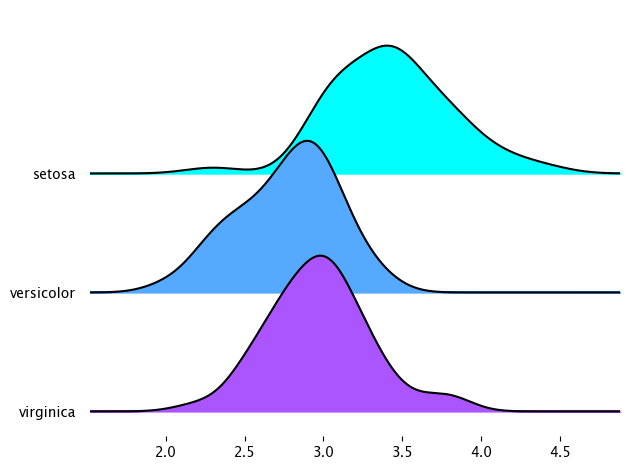

In [15]:
import seaborn as sns
from joypy import joyplot
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
joyplot(
    data=df,
    by="species",
    column="sepal_width",
    colormap=plt.cm.cool
)
plt.show()

#### 5. Sankeyview — Interactive Sankey Diagrams in the Browser
Most Sankey libraries are either R-only or JavaScript pain. Sankeyview is pure Python with smooth interactivity.

In [17]:
# %pip install sankeyview

In [18]:
import sankeyview as sv

nodes = ['Start', 'Step1', 'Step2', 'End']
links = [('Start', 'Step1', 10), ('Step1', 'Step2', 7), ('Step2', 'End', 5)]

spec = sv.Spec(nodes=nodes, links=links)
diagram = sv.render(spec)
diagram  # in Jupyter shows an interactive diagram

ImportError: cannot import name 'gcd' from 'fractions' (/opt/homebrew/Cellar/python@3.13/3.13.8/Frameworks/Python.framework/Versions/3.13/lib/python3.13/fractions.py)

#### 6. PyCirclize — Circos-Style Circular Visualizations
You’ve seen those genomic circular charts in science papers? You can do that in Python.

In [20]:
# %pip install pycirclize

In [1]:
from pycirclize import Circos

circos = Circos(sectors=["A", "B", "C"])
for sector in circos.sectors:
    sector.text(sector.name)

track = circos.add_track((0.8, 1.0))
track.bar([10, 20, 30], color="skyblue")
circos.plotfig()

AttributeError: 'list' object has no attribute 'items'

#### 7. Weave — GPU-Powered Interactive Dashboards
Hidden gem from the RAPIDS ecosystem. Weave binds your pandas/cuDF data into a live dashboard without a line of JS.

In [5]:
# %pip install weave
# %pip install cudf

In [6]:
import cudf
import weave

df = cudf.DataFrame({'x':[1,2,3,4], 'y':[10,20,30,40]})
weave.show(df)  # opens an interactive browser UI instantly

ModuleNotFoundError: No module named 'cudf'